In [10]:
#required libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [11]:
data=pd.read_csv('clean_data.csv')
df=pd.DataFrame(data)
df.head()

,Cycle_length,Phase,Mood,Age,Sleep_4-5 hours,Sleep_6-7 hours,Sleep_6-8 hours,Sleep_8-9 hours,Sleep_Less than 4 hours,Workout_24 hours,Workout_57 hours,Workout_810 hours,Workout_Less than 2 hours,Workout_More than 10 hours
0,30.0,Follicular,7.0,25,False,False,True,False,False,False,False,False,True,False
1,28.0,Menstrual,5.0,21-30,False,True,False,False,False,False,False,False,True,False
2,28.0,Luteal,4.0,21-30,False,False,False,True,False,False,False,False,True,False
3,28.0,Ovulation,5.0,21-30,False,True,False,False,False,False,False,False,False,False
4,28.0,Follicular,7.0,25,False,False,True,False,False,False,False,False,True,False


In [12]:
features=df.drop(['Mood'], axis=1)
target=df['Mood']

In [13]:
features = pd.get_dummies(features, columns=['Phase', 'Age'], drop_first=True)

In [14]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [15]:
#initializing the model
forest_model= RandomForestRegressor(
    n_estimators=250,
    max_depth=None,
    random_state=123
)

In [16]:
forest_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=123)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

#predictions
preds = forest_model.predict(x_test)

#metrics
rsq = r2_score(y_test, preds)
mse= mean_squared_error(y_test, preds)
rmse= np.sqrt(mse)

print('R-squared: ', rsq)
print('Root mean squared error: ',rmse)


R-squared:  0.6390444436963243
Root mean squared error:  1.600180908727525


/tmp/ipython-input-2799871364.py:10: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


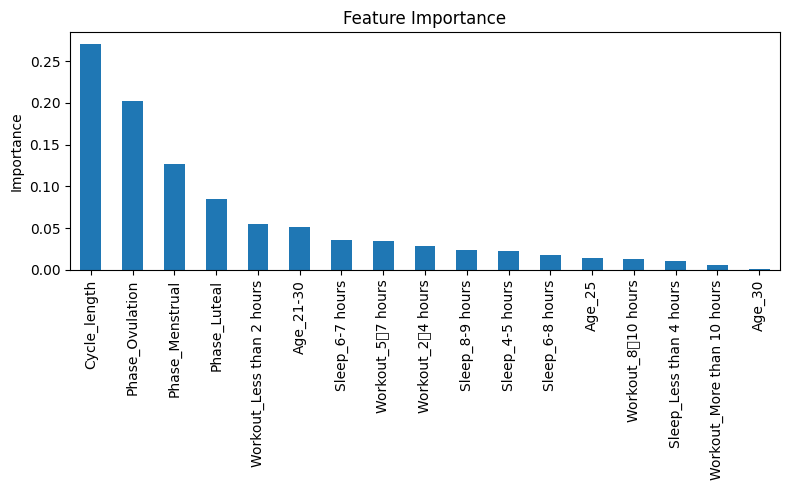

In [25]:
import matplotlib.pyplot as plt

importance = pd.Series(forest_model.feature_importances_,
                       index=features.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()